# Multiclass Log Regr

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_csv("Fish.csv")

In [80]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [82]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [83]:
df["Species"].unique() # 7 balık varmış

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [84]:
df["Species"].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

<Axes: xlabel='Species', ylabel='count'>

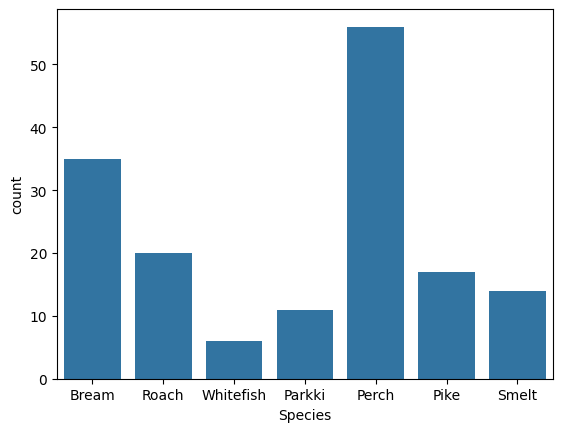

In [85]:
sns.countplot(x=df["Species"])

<Axes: xlabel='Weight', ylabel='Height'>

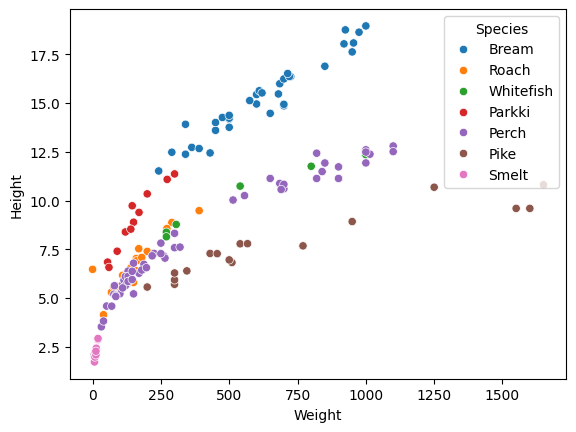

In [86]:
sns.scatterplot(x="Weight" , y="Height", data=df, hue="Species")

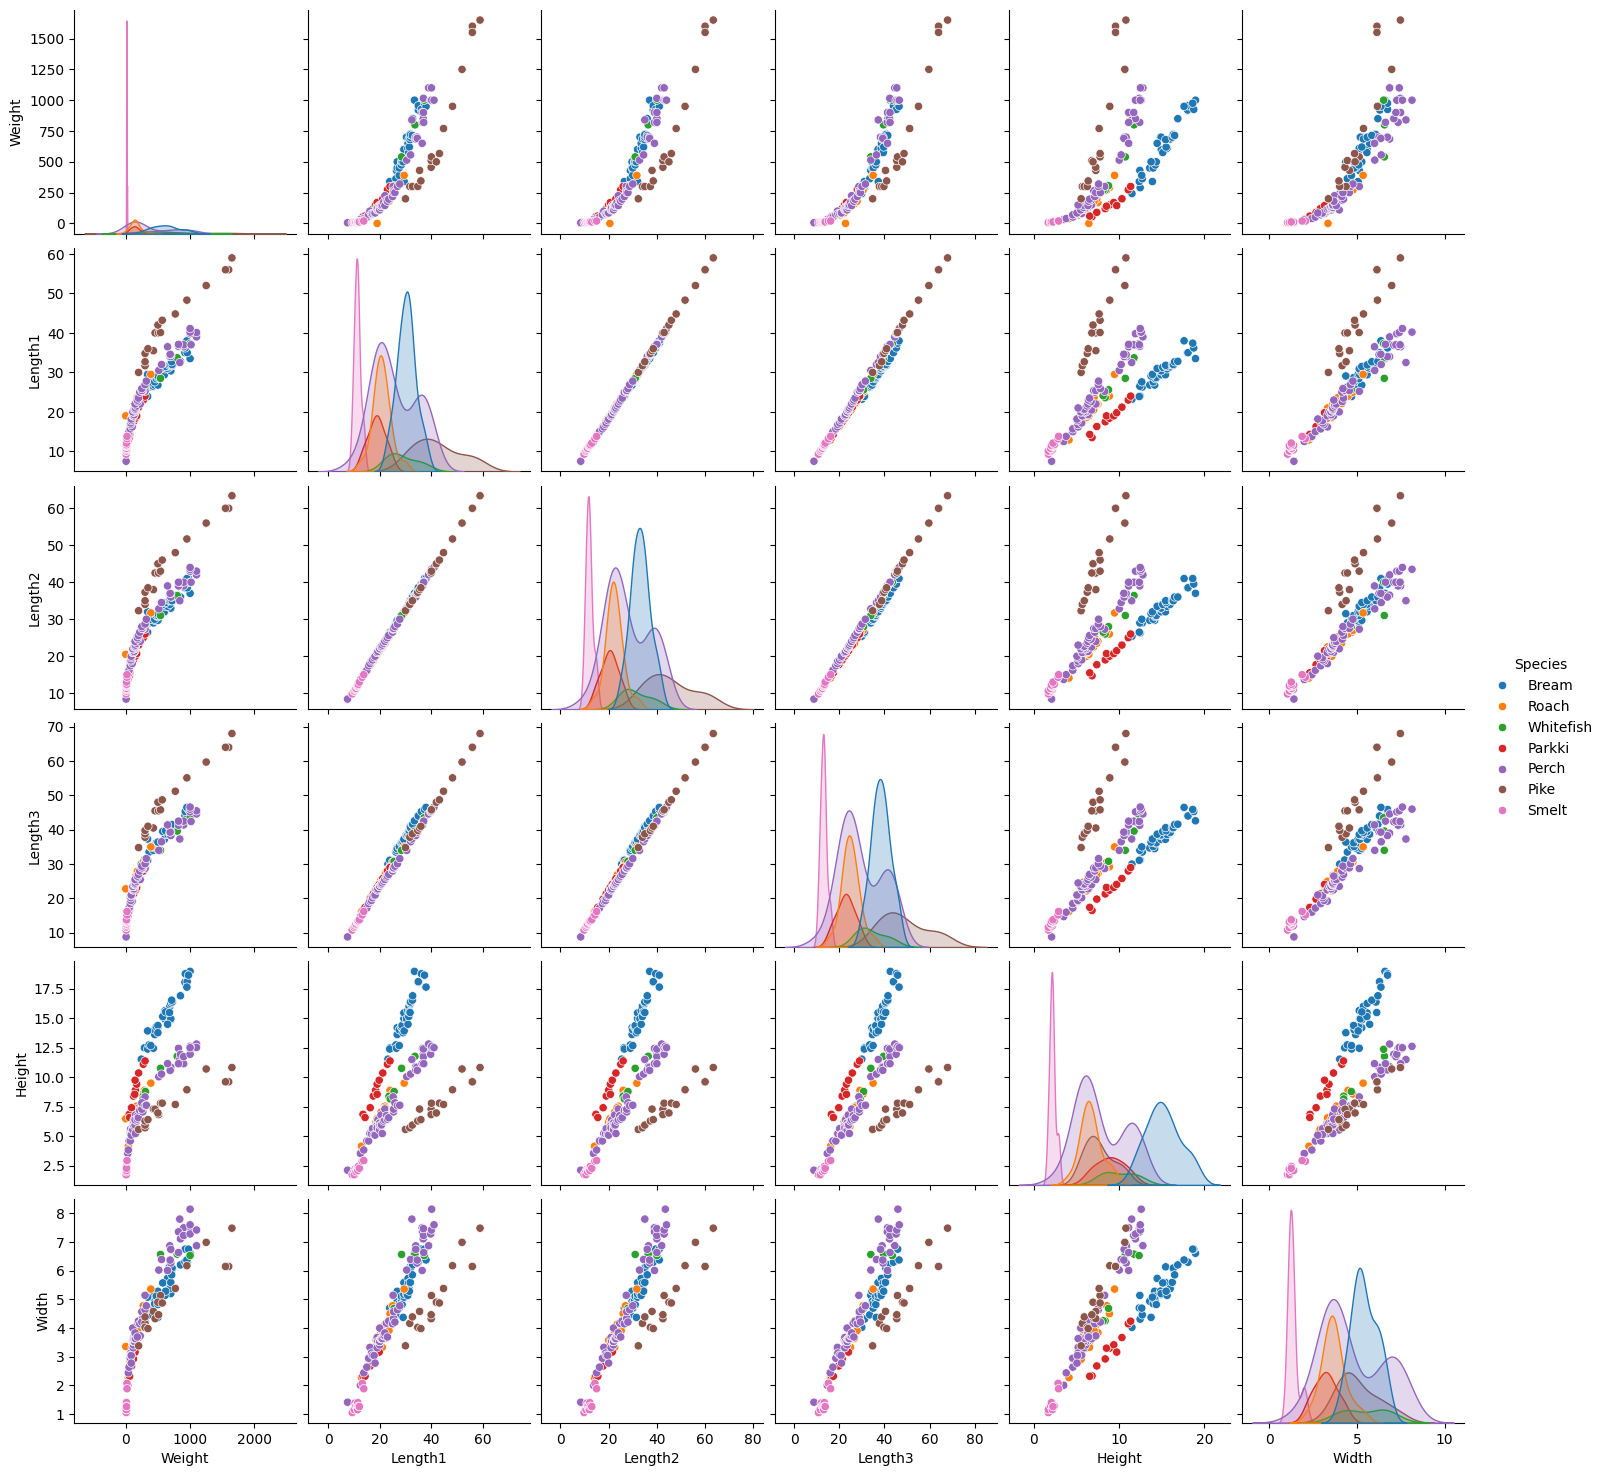

In [87]:
sns.pairplot(df , hue="Species")

<Axes: >

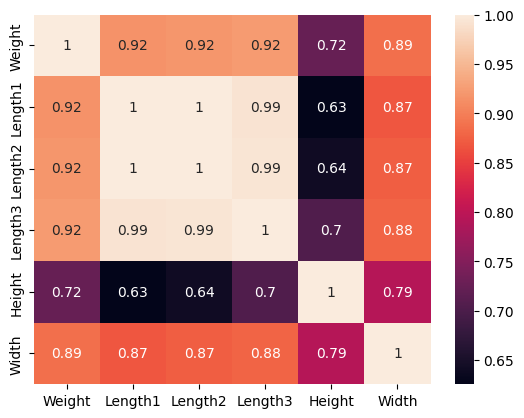

In [88]:
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True)

# Eğer değerler arasında sayısal olmayan veriler varsa onları değil de 
# Saddece sayısal olanları kullanmak için yazılabilir


# Train Test Split

In [89]:
x=df.drop("Species" , axis=1)
y=df["Species"]

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [91]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=9)

In [92]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Log Regr

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [94]:
log_model = LogisticRegression(solver= 'saga' , multi_class='ovr' , max_iter=5000)

In [95]:
penalty = ["l1", "l2"]

C =np.logspace(0,5,16) 
# C 1 den yüksekse veri train sete çok daha dikkatli bakıyor.
# C 1 den küçükse veri train seti göz ardı eder. Coefleri düşürüp penalty ekler.

In [96]:
C

array([1.00000000e+00, 2.15443469e+00, 4.64158883e+00, 1.00000000e+01,
       2.15443469e+01, 4.64158883e+01, 1.00000000e+02, 2.15443469e+02,
       4.64158883e+02, 1.00000000e+03, 2.15443469e+03, 4.64158883e+03,
       1.00000000e+04, 2.15443469e+04, 4.64158883e+04, 1.00000000e+05])

In [97]:
grid_model = GridSearchCV(
    log_model,
    param_grid={"C" :C , "penalty" : penalty}    
    )

In [98]:
grid_model.fit(scaled_X_train , y_train)

C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) ins

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.15443469e+00, 4.64158883e+00, 1.00000000e+01,
       2.15443469e+01, 4.64158883e+01, 1.00000000e+02, 2.15443469e+02,
       4.64158883e+02, 1.00000000e+03, 2.15443469e+03, 4.64158883e+03,
       1.00000000e+04, 2.15443469e+04, 4.64158883e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']})

In [99]:
grid_model.best_params_

{'C': np.float64(10.0), 'penalty': 'l1'}

In [100]:
grid_model.best_estimator_ # Log regr parametreleri

LogisticRegression(C=np.float64(10.0), max_iter=5000, multi_class='ovr',
                   penalty='l1', solver='saga')

In [101]:
grid_model.best_estimator_.coef_

array([[ -2.72318705,   0.        ,   0.        ,   0.        ,
         11.21494584,  -1.20697195],
       [ -7.15192953,   0.        ,   0.        , -11.22589043,
         11.35222011,   0.        ],
       [ -1.5937164 ,   4.93743084,  28.65054255, -37.29584443,
         -0.58114732,   5.29817626],
       [ -0.62961701,   2.47757907,   2.13585826,   3.9749156 ,
         -5.33460212,  -2.32256511],
       [-10.44919404,   0.        , -21.3046509 ,  21.33960152,
         -1.81036967,   5.82343846],
       [  0.        ,   2.31035983,   0.        ,   0.8887687 ,
         -5.27175798,  -6.09716418],
       [ -2.42976522,  -0.73307024,   0.        ,   0.        ,
          0.        ,   3.43241542]])

# Performans

In [105]:
from sklearn.metrics import  accuracy_score , ConfusionMatrixDisplay , classification_report

In [106]:
fish_pred = grid_model.predict(scaled_X_test)

In [107]:
accuracy_score(y_test , fish_pred)

0.9375

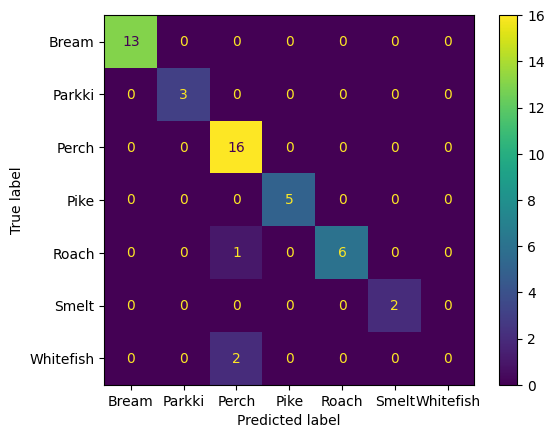

In [108]:
ConfusionMatrixDisplay.from_estimator(grid_model , scaled_X_test , y_test)

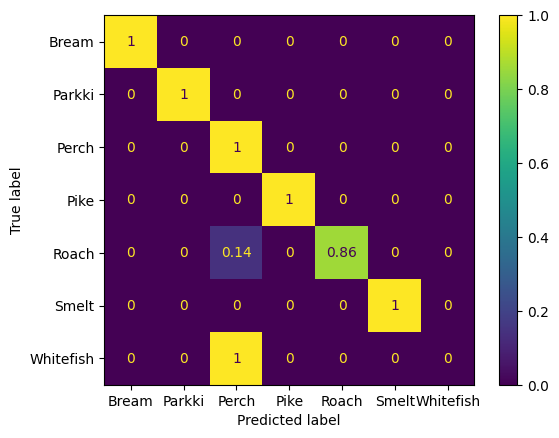

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid_model , scaled_X_test , y_test , normalize="true")

Dağılım grafiğine bakıldığında whitefishlerin perch olarak tahmin edildiği görünüyor.
Bunun sebebi scatterplotta , whitefislerin pearch üzerine dağılmasından kaynaklanıyor.

In [111]:
print(classification_report(y_test , fish_pred))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        13
      Parkki       1.00      1.00      1.00         3
       Perch       0.84      1.00      0.91        16
        Pike       1.00      1.00      1.00         5
       Roach       1.00      0.86      0.92         7
       Smelt       1.00      1.00      1.00         2
   Whitefish       0.00      0.00      0.00         2

    accuracy                           0.94        48
   macro avg       0.83      0.84      0.83        48
weighted avg       0.91      0.94      0.92        48



C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati